# Elastic field around a finite dislocation segment

Plane Elastic problem

We test the computation of the displacement and stress at observation points by setting the solution of the collocation BEM to the analytical solution on the BE mesh.

Unit displacement discontinuity centered around the origin:

$\Delta u_i (x_1,x_2=0)= 1 $  for $x_1 \in [-1,1]$, and $i=1,\,2$

In [1]:
# %% importing BigWham 
import sys
import os
import numpy as np

home = os.environ["HOME"]
sys.path.append("/Users/bricelecampion/ClionProjects/BigWham_dev/build/interfaces/python")
from hmatrix import Hmatrix


In [2]:
#%% Elastic properties
G = 1.0
nu = 0.25
E = (2 * G) * (1 + nu)

# %% Mesh 
a = 2.3
nelts = 1
coor1D = np.linspace(-a, a, nelts + 1)
coor = np.transpose(np.array([coor1D, coor1D * 0.0]))
conn = np.fromfunction(lambda i, j: i + j, (nelts, 2), dtype=np.int_)


In [3]:
kernel = "2DP0"
elas_prop = np.array([E, nu])
eta=3.0
max_leaf_size = 64
eps_aca = 1.0e-3
h = Hmatrix(kernel, coor, conn, elas_prop, max_leaf_size, eta, eps_aca)

colpts=h.getCollocationPoints()


In [4]:
colpts

array([[0., 0.]])

In [5]:
# x

x_obs=np.linspace(0.,3*a,90)
obs_pts = np.transpose([x_obs , x_obs*0.])

In [6]:
d = np.array([0.,0.89])
disp=h.compute_displacements(obs_pts,d)   

In [7]:
# solution of displacement due to a segment displacement discontinuity centered at origin and orienterd along x-axis 
# displacement along y=0 - Solution from Crouch & Starfield page 82
def DD_displacement_y_0(x,a=1.,nu=0.25,d_x=1,d_y=1):
    # we code y=0- expressions
    # note Crouch convnetion: positive dd in overlap
    ux=-(1-2*nu)/(4*np.pi*(1-nu))*d_y*np.log(np.abs((x-a)/(x+a))) 
    uy= (1-2*nu)/(4*np.pi*(1-nu))*d_x*np.log(np.abs((x-a)/(x+a)))
    ux[np.where(abs(x)<a)[0]]+=0.5*d_x
    uy[np.where(abs(x)<a)[0]]+=0.5*d_y
    return ux,uy    


In [8]:
uxa,uya=DD_displacement_y_0(x_obs,a=a,nu=nu,d_x=0.,d_y=0.89)

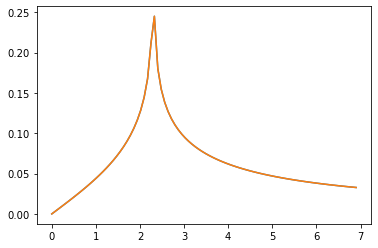

In [9]:
import matplotlib.pyplot as plt

plt.plot(x_obs,disp[:,0])
plt.plot(x_obs,uxa) #

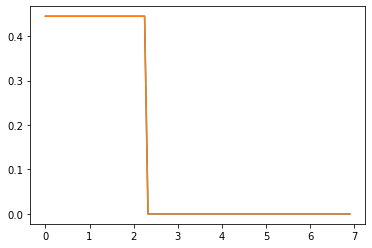

In [10]:
plt.plot(x_obs,disp[:,1])
plt.plot(x_obs,uya)

In [15]:
# check values slightly below y=0 
obs_ptsdw = np.transpose([x_obs , x_obs*0.-0.01])
dispdw=h.compute_displacements(obs_ptsdw,d) # minus sign due to the fact that the T-kernel is - displacement  ! 

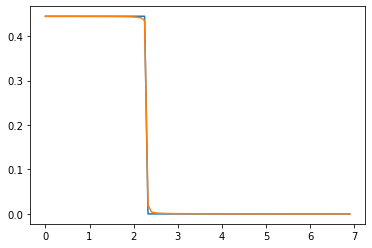

In [16]:
plt.plot(x_obs,disp[:,1])
plt.plot(x_obs,dispdw[:,1])

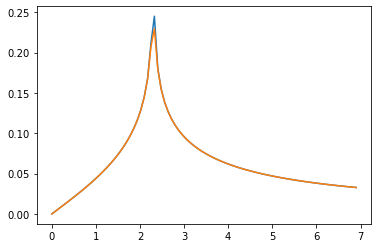

In [17]:
plt.plot(x_obs,disp[:,0])
plt.plot(x_obs,dispdw[:,0])

In [18]:
x_obs

array([0.        , 0.07752809, 0.15505618, 0.23258427, 0.31011236,
       0.38764045, 0.46516854, 0.54269663, 0.62022472, 0.69775281,
       0.7752809 , 0.85280899, 0.93033708, 1.00786517, 1.08539326,
       1.16292135, 1.24044944, 1.31797753, 1.39550562, 1.47303371,
       1.5505618 , 1.62808989, 1.70561798, 1.78314607, 1.86067416,
       1.93820225, 2.01573034, 2.09325843, 2.17078652, 2.24831461,
       2.3258427 , 2.40337079, 2.48089888, 2.55842697, 2.63595506,
       2.71348315, 2.79101124, 2.86853933, 2.94606742, 3.02359551,
       3.1011236 , 3.17865169, 3.25617978, 3.33370787, 3.41123596,
       3.48876404, 3.56629213, 3.64382022, 3.72134831, 3.7988764 ,
       3.87640449, 3.95393258, 4.03146067, 4.10898876, 4.18651685,
       4.26404494, 4.34157303, 4.41910112, 4.49662921, 4.5741573 ,
       4.65168539, 4.72921348, 4.80674157, 4.88426966, 4.96179775,
       5.03932584, 5.11685393, 5.19438202, 5.27191011, 5.3494382 ,
       5.42696629, 5.50449438, 5.58202247, 5.65955056, 5.73707